<a href="https://colab.research.google.com/github/shababrizvicse/Student_Marks_Prediction/blob/main/Student_Marks_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#load dataset
df=pd.read_csv("https://raw.githubusercontent.com/Govind155/Students-Mark-Predictor/main/student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


Text(0, 0.5, 'student marks')

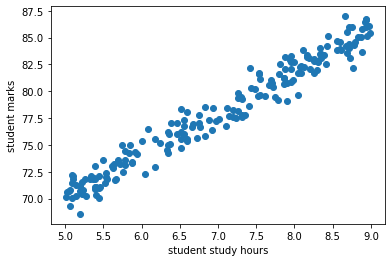

In [ ]:
#Discover and Visualise data
df.describe
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")

In [ ]:
#prepare the data for machine algorithm
#data cleaning
df.isnull().sum(0)


study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()
df2=df.fillna(df.mean())
df2.isnull().sum(0)

study_hours      0
student_marks    0
dtype: int64

In [ ]:
#split dataset
X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shhape of X=",X.shape)
print("shape of y=",y.shape)

shhape of x= (200, 1)
shape of y= (200, 1)


In [ ]:
from sklearn.model_selection import train_test_split
#out of 200,160 will be train data and 40 will be test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)


In [ ]:
#select model and train it
#y=mx+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
lr.intercept_
lr.predict([[4]])[0][0].round(2)# ptedict at 4 hours

66.19

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["StudyHours","StudentMarks_Original","StudentMarks_predicted"])
#fine tune the model
lr.score(x_test,y_test)

0.9514124242154466

In [ ]:
#save the model
import joblib
joblib.dump(lr,"Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']